## Módulos

In [3]:
# instalar nova ferramenta para testes de hipoteses
! sudo pip install pingouin

     |████████████████████████████████| 182 kB 22.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 9.8 MB 48.7 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193660 sha256=db559539923af1cf281f27c455f7754e105cb9780f7b17467d7391b4183d8b77
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=198397593299f18938412d643b5d90c353fb7ce00cdcd4be2d891ee362e7a82f
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling stats

In [9]:
# instalar versão atualizada
! sudo pip install scipy==1.7.1

     |████████████████████████████████| 28.5 MB 71.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
# gerais
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# analises
from scipy import stats as st
import pingouin as pg

## Dados

In [3]:
dados_credito = pd.read_csv('dados_credito_small.csv')
dados_credito.head()

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat
0,1,41,3,18,176,10.3,5.01,nao_pagou,ensin_sup,acima_40,"(54,446]"
1,2,27,1,10,31,17.3,4.00,pagou,ensin_basico,abaixo_30,"(24,34]"
2,3,40,1,15,55,5.5,2.17,pagou,ensin_basico,entre_30_40,"(54,446]"
3,4,41,1,15,120,2.9,0.82,pagou,ensin_basico,acima_40,"(54,446]"
4,5,24,2,2,28,17.3,3.06,nao_pagou,ensin_medio,abaixo_30,"(24,34]"


## 1 - V de Cramer

In [4]:
# obter a tabela cruzada
tabela = pd.crosstab(dados_credito['default'], dados_credito['renda_cat'])
tabela

renda_cat,"(24,34]","(34,54]","(54,446]","[14,24]"
default,,,,
nao_pagou,24,28,28,49
pagou,103,95,96,77


In [5]:
vcramer_1 = st.contingency.association(tabela, method='cramer')
vcramer_1

0.1772006817387785

## 2 - Gráficos

- renda, divida

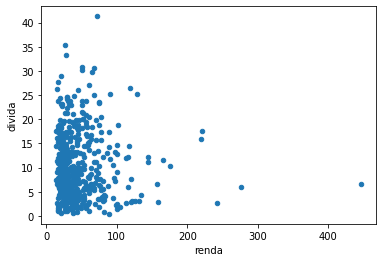

In [6]:
dados_credito.plot.scatter(x='renda', y='divida')

- renda, outras_div

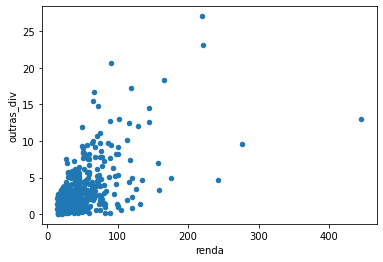

In [7]:
dados_credito.plot.scatter(x='renda', y='outras_div')

- outras_div, divida

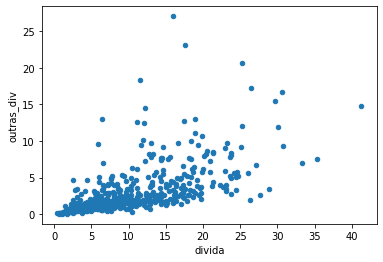

In [8]:
dados_credito.plot.scatter(x='divida', y='outras_div')

## 3 - Correlação de Pearson entre renda, divida e outras_div.

In [9]:
# correlacao
cols = ['renda', 'divida', 'outras_div']
pearson_correl = dados_credito[cols].corr()
pearson_correl

,renda,divida,outras_div
renda,1.000000,-0.016425,0.584408
divida,-0.016425,1.000000,0.613745
outras_div,0.584408,0.613745,1.000000


In [10]:
# matriz ajustada
pearson_correl.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,renda,divida,outras_div
renda,1.00,-0.02,0.58
divida,-0.02,1.00,0.61
outras_div,0.58,0.61,1.00


## 4 - Teste de correlação entre renda, divida e outras_div.

In [11]:
correl_columns = ['renda', 'divida', 'outras_div']

In [15]:
# teste
pg.pairwise_corr(dados_credito, 
                 columns = correl_columns, 
                 method = 'pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,renda,divida,pearson,two-sided,500,-0.016425,"[-0.1, 0.07]",7.140881e-01,0.06,0.065492
1,renda,outras_div,pearson,two-sided,500,0.584408,"[0.52, 0.64]",3.979145e-47,5.665e+43,1.000000
2,divida,outras_div,pearson,two-sided,500,0.613745,"[0.56, 0.67]",4.428785e-53,4.591e+49,1.000000
